<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Data

In [2]:
# Don't forget to import data!
import pandas as pd
df = pd.read_csv("HW3_movie_metadata.csv")

In [3]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isna())

       director_name  ...  movie_facebook_likes
0      James Cameron  ...                 33000
1     Gore Verbinski  ...                     0
2         Sam Mendes  ...                 85000
3  Christopher Nolan  ...                164000
4        Doug Walker  ...                     0

[5 rows x 27 columns]
         director_name  ...  movie_facebook_likes
5038       Scott Smith  ...                    84
5039               NaN  ...                 32000
5040  Benjamin Roberds  ...                    16
5041       Daniel Hsia  ...                   660
5042          Jon Gunn  ...                   456

[5 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   502

# Preprocess Data

In [4]:
df2 = df.copy()
df2 = df2._get_numeric_data()
df2 = df2.fillna(df2.median())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     5043 non-null   float64
 1   duration                   5043 non-null   float64
 2   director_facebook_likes    5043 non-null   float64
 3   actor_3_facebook_likes     5043 non-null   float64
 4   actor_1_facebook_likes     5043 non-null   float64
 5   gross                      5043 non-null   float64
 6   num_voted_users            5043 non-null   int64  
 7   cast_total_facebook_likes  5043 non-null   int64  
 8   facenumber_in_poster       5043 non-null   float64
 9   num_user_for_reviews       5043 non-null   float64
 10  budget                     5043 non-null   float64
 11  title_year                 5043 non-null   float64
 12  actor_2_facebook_likes     5043 non-null   float64
 13  imdb_score                 5043 non-null   float

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faadce34410>,
      dtype=object)

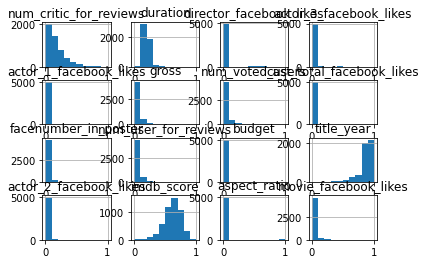

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df3.hist()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(df3,test_size=0.3,shuffle=True,random_state=1)

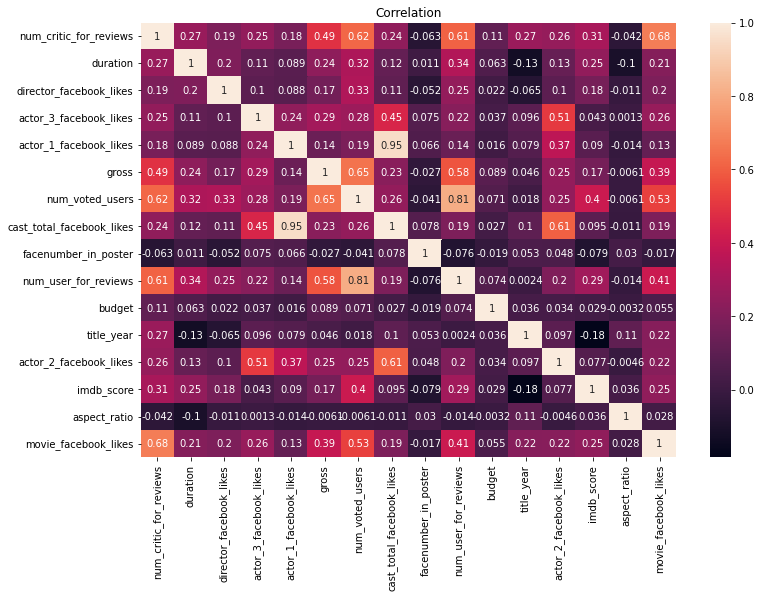

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),annot=True)
plt.title("Correlation")
plt.show()

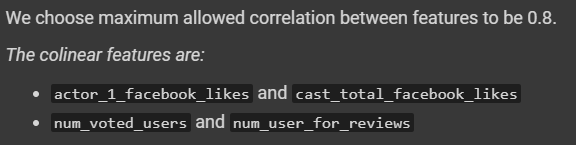

In [ ]:
X_train = X_train.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])
X_test = X_test.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])

# Modeling Data (KM)

In [9]:
from sklearn import metrics
from sklearn.cluster import KMeans

Sum_of_squared_distances_train = []
Sum_of_squared_distances_test = []
Silhouette_train=[]
Silhouette_test=[]
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    pred_train=km.predict(X_train)
    pred_test=km.predict(X_test)
    Sum_of_squared_distances_train.append(abs(km.score(X_train)))
    Sum_of_squared_distances_test.append(abs(km.score(X_test)))
    Silhouette_train.append(metrics.cluster.silhouette_score(X_train,pred_train,metric='euclidean'))
    Silhouette_test.append(metrics.cluster.silhouette_score(X_test,pred_test,metric='euclidean'))

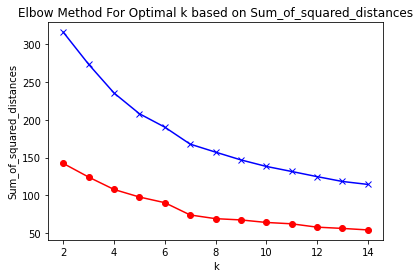

In [10]:
plt.plot(K, Sum_of_squared_distances_train, 'bx-')
plt.plot(K, Sum_of_squared_distances_test, 'ro-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k based on Sum_of_squared_distances')
plt.show()

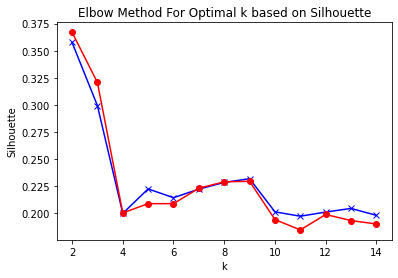

In [11]:
plt.plot(K, Silhouette_train, 'bx-')
plt.plot(K, Silhouette_test, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Elbow Method For Optimal k based on Silhouette')
plt.show()

I choose K = 9 because it is a local maximum on silhouette coefficient and not too low.

In [14]:
km1 = KMeans(n_clusters=9)
km1.fit(X_train)
X_pred_9 = km1.predict(X_test)

In [15]:
km2 = KMeans(n_clusters=2)
km2.fit(X_train)
X_pred_2 = km2.predict(X_test)

In [16]:
metrics.cluster.contingency_matrix(X_pred_9, X_pred_2)

array([[  1, 374],
       [  7,  95],
       [ 27,   4],
       [ 36,  18],
       [  0, 131],
       [  0,  19],
       [ 89,   0],
       [163, 130],
       [  0, 419]])